In [46]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("../datasets/train.csv")
df.head()

,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f


In [4]:
df.describe()

,timestamp,value,label
count,2.476315e+06,2.476315e+06,2.476315e+06
mean,1.495904e+09,1.080211e+08,2.160468e-02
std,4.479875e+06,3.196926e+08,1.453889e-01
min,1.467302e+09,-4.546069e+00,0.000000e+00
25%,1.494256e+09,3.700000e+00,0.000000e+00
50%,1.496356e+09,1.293438e+03,0.000000e+00
75%,1.498562e+09,2.523000e+03,0.000000e+00
max,1.502447e+09,1.608813e+09,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476315 entries, 0 to 2476314
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   value      float64
 2   label      int64  
 3   KPI ID     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 75.6+ MB


<AxesSubplot:>

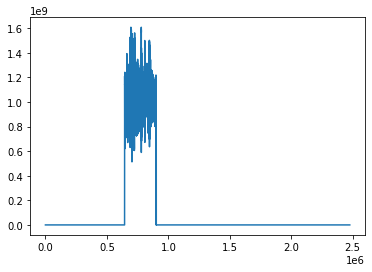

In [13]:
df["value"].plot()

## 0 = No Anomaly, 1 = Anomaly

In [12]:
df["label"].value_counts()

0    2422815
1      53500
Name: label, dtype: int64

In [49]:
df["label"].describe()

count    2.476315e+06
mean     2.160468e-02
std      1.453889e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: label, dtype: float64

<AxesSubplot:xlabel='timestamp', ylabel='value'>

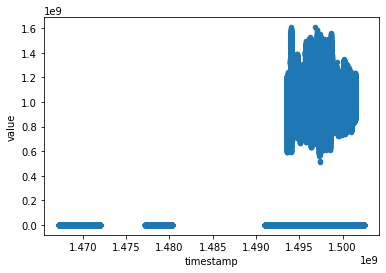

In [14]:
df.plot.scatter(x="timestamp", y="value")

In [16]:
df

,timestamp,value,label,KPI ID
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f
2,1493568120,2.000000,0,02e99bd4f6cfb33f
3,1493568180,1.885246,0,02e99bd4f6cfb33f
4,1493568240,1.819672,0,02e99bd4f6cfb33f
...,...,...,...,...
2476310,1496895300,0.161922,1,88cf3a776ba00e7c
2476311,1496895360,0.162297,1,88cf3a776ba00e7c
2476312,1496895420,0.160597,1,88cf3a776ba00e7c
2476313,1496895480,0.160393,1,88cf3a776ba00e7c


## Distribution of Values with anomaly

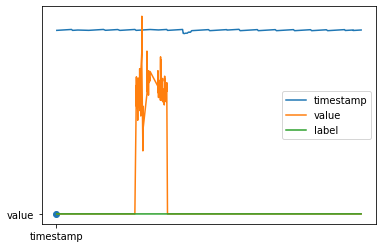

In [45]:
df[df["label"]==1].plot().scatter(x="timestamp", y="value")

## Distribution of Values without anomaly

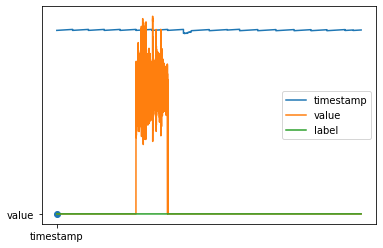

In [44]:
df[df["label"]==0].plot().scatter(x="timestamp", y="value")

## Transfers dataframe analysis

In [18]:
# Required Libraries
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_calculation(col_name):
    adf_test = adfuller(col_name)
    adf_output = pd.Series(adf_test[0:4], index=["Test-Statistic", "p-value", "Lags Used", "Number of observations"])
    for key, value in adf_test[4].items():
        adf_output["critical_value (%s) "%key] = value
    print(adf_output)

In [25]:
adf_calculation(df["value"][:15000])

Test-Statistic               -3.140525
p-value                       0.023696
Lags Used                    42.000000
Number of observations    14957.000000
critical_value (1%)          -3.430787
critical_value (5%)          -2.861733
critical_value (10%)         -2.566873
dtype: float64


<AxesSubplot:>

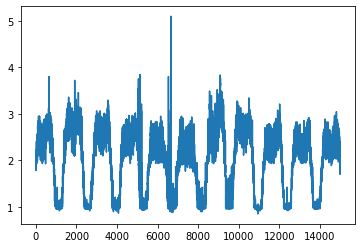

In [27]:
df["value"][:15000].plot()

In [31]:
adf_calculation(df["timestamp"][:10000])

Test-Statistic               0.715049
p-value                      0.990133
Lags Used                    0.000000
Number of observations    9999.000000
critical_value (1%)         -3.431004
critical_value (5%)         -2.861829
critical_value (10%)        -2.566924
dtype: float64


<AxesSubplot:>

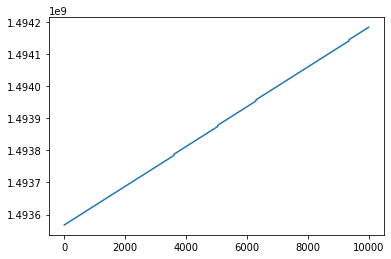

In [33]:
df["timestamp"][:10000].plot()